In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [2]:
from linetimer import CodeTimer

In [3]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt


def load_esdf_with_distance(file_path):
    """
    Load an ESDF .ply file and extract points (x, y, z) and intensity (distance).
    """
    with CodeTimer("load_esdf/read_lines"):
        with open(file_path, "r") as f:
            lines = f.readlines()

    with CodeTimer("load_esdf/parse_header"):
        header_ended = False
        data_start_idx = 0
        for i, line in enumerate(lines):
            if "end_header" in line:
                header_ended = True
                data_start_idx = i + 1
                break

        if not header_ended:
            raise ValueError("The input file does not appear to be a valid .ply file.")

    with CodeTimer("load_esdf/loadtxt"):
        # Load the point data (x, y, z, intensity)
        data = np.loadtxt(lines[data_start_idx:], dtype=float)
        if data.shape[1] != 4:
            raise ValueError("The input .ply file must have 4 columns: x, y, z, intensity.")

        points = data[:, :3]
        distances= data[:, 3]
        return points, distances 

    
def parse_esdf_filename(file_path):
    pattern = r"./violation_results/([^/]+)/([^/]+)/([^_]+)_"

    # Match the pattern
    match = re.search(pattern, file_path)

    if match:
        folder_name = match.group(1)  # 'office3'
        subfolder_name = match.group(2)  # '1e-5'
        file_name_prefix = match.group(3)  # 'certified'
        if file_name_prefix == "baseline":
            algorithm = "1_baseline"
        if file_name_prefix == "certified":
            algorithm = "3_certified"
        if file_name_prefix == "heuristic":
            algorithm = "2_heuristic"
        
        return {
            "environment": folder_name,
            "covariance": subfolder_name,
            "algorithm": algorithm,
            "case": (folder_name, subfolder_name, algorithm),
            "filepath": file_path
        }
    else:
        print("No match found.")
        assert(False)
        
def parse_violations_filename(file_path):
    pattern = r"./violation_results/([^/]+)/([^/]+)/([^_]+).ply"

    # Match the pattern
    match = re.search(pattern, file_path)

    if match:
        folder_name = match.group(1)  # 'office3'
        subfolder_name = match.group(2)  # '1e-5'
        file_name_prefix = match.group(3)  # 'certified'
        if file_name_prefix == "baseline":
            algorithm = "1_baseline"
        if file_name_prefix == "certified":
            algorithm = "3_certified"
        if file_name_prefix == "heuristic":
            algorithm = "2_heuristic"
        
        return {
            "environment": folder_name,
            "covariance": subfolder_name,
            "algorithm": algorithm,
            "case": (folder_name, subfolder_name, algorithm),
            "filepath": file_path
        }
    else:
        print("No match found.")
        assert(False)


In [4]:
def boxplot_stats(data, label):

    q0 = np.nanpercentile(data, 0)
    q1 = np.nanpercentile(data, 25)
    med = np.nanpercentile(data, 50)
    q3 = np.nanpercentile(data, 75)
    q4 = np.nanpercentile(data, 100)
    
    iqr = q3 - q1
    
    lo_idx = data > (q1 - 1.5*iqr)
    hi_idx = data < (q3 + 1.5*iqr)
    
    
    whislo = min(data[lo_idx], default=q1)
    whishi = max(data[hi_idx], default=q3)
#     whislo = q0
#     whishi = q4
    
    
    fliers = [d for d in data if not whislo <= d <= whishi]
    if len(fliers) > 0:
        fliers = [max(fliers)]
    else:
        fliers = []
    
    return {
        "label": label,
        "whislo": whislo,
        "q1": q1,
        "med": med,
        "q3": q3,
        "whishi": whishi,
        "fliers": fliers,
    }

In [5]:
root_folder = "./violation_results/"

In [6]:
esdf_files = []
violation_files = []

for subdir, _, files in os.walk(root_folder):
    for file in files:
        if file.endswith("esdf.ply"):
            file_path = os.path.join(subdir, file)
            print(f"Processing: {file_path}")
            parsed_filename = parse_esdf_filename(file_path)
            parsed_filename["file_path"] = file_path
            esdf_files.append(parsed_filename)
        elif file.endswith(".ply"):
            file_path = os.path.join(subdir, file)
            print(f"Processing: {file_path}")
            parsed_filename = parse_violations_filename(file_path)
            parsed_filename["file_path"] = file_path
            violation_files.append(parsed_filename)

Processing: ./violation_results/office0/1e-5/certified_esdf.ply
Processing: ./violation_results/office0/1e-5/baseline.ply
Processing: ./violation_results/office0/1e-5/heuristic_esdf.ply
Processing: ./violation_results/office0/1e-5/heuristic.ply
Processing: ./violation_results/office0/1e-5/baseline_esdf.ply
Processing: ./violation_results/office0/1e-5/certified.ply
Processing: ./violation_results/office0/1e-6/certified_esdf.ply
Processing: ./violation_results/office0/1e-6/baseline.ply
Processing: ./violation_results/office0/1e-6/heuristic_esdf.ply
Processing: ./violation_results/office0/1e-6/heuristic.ply
Processing: ./violation_results/office0/1e-6/baseline_esdf.ply
Processing: ./violation_results/office0/1e-6/certified.ply
Processing: ./violation_results/office4/1e-5/certified_esdf.ply
Processing: ./violation_results/office4/1e-5/baseline.ply
Processing: ./violation_results/office4/1e-5/heuristic_esdf.ply
Processing: ./violation_results/office4/1e-5/heuristic.ply
Processing: ./violati

In [7]:
esdf_files[0]

{'environment': 'office0',
 'covariance': '1e-5',
 'algorithm': '3_certified',
 'case': ('office0', '1e-5', '3_certified'),
 'filepath': './violation_results/office0/1e-5/certified_esdf.ply',
 'file_path': './violation_results/office0/1e-5/certified_esdf.ply'}

In [8]:
violation_files[0]

{'environment': 'office0',
 'covariance': '1e-5',
 'algorithm': '1_baseline',
 'case': ('office0', '1e-5', '1_baseline'),
 'filepath': './violation_results/office0/1e-5/baseline.ply',
 'file_path': './violation_results/office0/1e-5/baseline.ply'}

In [9]:
# find unique cases
cases = []
for f in esdf_files:
    cases.append( f["case"])

cases = sorted(list(set(cases)))
print(cases)

[('office0', '1e-5', '1_baseline'), ('office0', '1e-5', '2_heuristic'), ('office0', '1e-5', '3_certified'), ('office0', '1e-6', '1_baseline'), ('office0', '1e-6', '2_heuristic'), ('office0', '1e-6', '3_certified'), ('office1', '1e-5', '1_baseline'), ('office1', '1e-5', '2_heuristic'), ('office1', '1e-5', '3_certified'), ('office1', '1e-6', '1_baseline'), ('office1', '1e-6', '2_heuristic'), ('office1', '1e-6', '3_certified'), ('office2', '1e-5', '1_baseline'), ('office2', '1e-5', '2_heuristic'), ('office2', '1e-5', '3_certified'), ('office2', '1e-6', '1_baseline'), ('office2', '1e-6', '2_heuristic'), ('office2', '1e-6', '3_certified'), ('office3', '1e-5', '1_baseline'), ('office3', '1e-5', '2_heuristic'), ('office3', '1e-5', '3_certified'), ('office3', '1e-6', '1_baseline'), ('office3', '1e-6', '2_heuristic'), ('office3', '1e-6', '3_certified'), ('office4', '1e-5', '1_baseline'), ('office4', '1e-5', '2_heuristic'), ('office4', '1e-5', '3_certified'), ('office4', '1e-6', '1_baseline'), (

In [13]:
def get_bounding_box(case, violation_files):
    for vf in violation_files:
        if vf["case"] == case:
            # load the file
            pts, dists = load_esdf_with_distance(vf["file_path"])
            
            minx = min(pts[:, 0])
            maxx = max(pts[:, 0])
            
            miny = min(pts[:, 1])
            maxy = max(pts[:, 1])
            
            minz = min(pts[:, 2])
            maxz = max(pts[:, 2])
            
            print(minx, miny, minz)
            print(maxx, maxy, maxz)
            
            print(maxx - minx, maxy - miny, maxz-minz)

In [19]:
cases[0:48:6]

[('office0', '1e-5', '1_baseline'),
 ('office1', '1e-5', '1_baseline'),
 ('office2', '1e-5', '1_baseline'),
 ('office3', '1e-5', '1_baseline'),
 ('office4', '1e-5', '1_baseline'),
 ('room0', '1e-5', '1_baseline'),
 ('room1', '1e-5', '1_baseline'),
 ('room2', '1e-5', '1_baseline')]

In [20]:

bboxes = [
    get_bounding_box(case, violation_files) for case in cases[0:48:6]]

Code block 'load_esdf/read_lines' took: 59.31815 ms
Code block 'load_esdf/parse_header' took: 0.00420 ms
Code block 'load_esdf/loadtxt' took: 371.61812 ms
-2.005615234375 -3.1536941528320312 -1.168869137763977
2.394385814666748 1.8561344146728516 1.8229918479919434
4.400001049041748 5.009828567504883 2.9918609857559204
Code block 'load_esdf/read_lines' took: 40.84232 ms
Code block 'load_esdf/parse_header' took: 0.00650 ms
Code block 'load_esdf/loadtxt' took: 262.28230 ms
-1.8204076290130615 -1.5824083089828491 -1.0477068424224854
2.990403175354004 2.523076295852661 1.749058723449707
4.810810804367065 4.10548460483551 2.7967655658721924
Code block 'load_esdf/read_lines' took: 84.14669 ms
Code block 'load_esdf/parse_header' took: 0.00453 ms
Code block 'load_esdf/loadtxt' took: 552.37758 ms
-3.4271740913391113 -2.8455357551574707 -1.2265046834945679
3.0453484058380127 5.297982692718506 1.5413813591003418
6.472522497177124 8.143518447875977 2.7678860425949097
Code block 'load_esdf/read_lin

In [10]:
# violation distances as a histogram

In [11]:
def get_violation_distances(case, violation_files):
    for vf in violation_files:
        if vf["case"] == case:
            # load the file
            pts, dists = load_esdf_with_distance(vf["file_path"])
            
            return dists
#             violation_dist = 2.0001 * 0.02
#             violations = dists[dists >= violation_dist]
#             violations = violations - violation_dist
#             return violations

In [249]:
violation_distances = [
    get_violation_distances(case, violation_files) for case in cases]

Code block 'load_esdf/read_lines' took: 58.00594 ms
Code block 'load_esdf/parse_header' took: 0.00431 ms
Code block 'load_esdf/loadtxt' took: 355.95332 ms
Code block 'load_esdf/read_lines' took: 55.95326 ms
Code block 'load_esdf/parse_header' took: 0.00534 ms
Code block 'load_esdf/loadtxt' took: 354.16821 ms
Code block 'load_esdf/read_lines' took: 57.15762 ms
Code block 'load_esdf/parse_header' took: 0.00477 ms
Code block 'load_esdf/loadtxt' took: 357.60703 ms
Code block 'load_esdf/read_lines' took: 57.33594 ms
Code block 'load_esdf/parse_header' took: 0.00430 ms
Code block 'load_esdf/loadtxt' took: 361.57461 ms
Code block 'load_esdf/read_lines' took: 57.63524 ms
Code block 'load_esdf/parse_header' took: 0.00510 ms
Code block 'load_esdf/loadtxt' took: 354.51619 ms
Code block 'load_esdf/read_lines' took: 56.13397 ms
Code block 'load_esdf/parse_header' took: 0.00536 ms
Code block 'load_esdf/loadtxt' took: 360.67850 ms
Code block 'load_esdf/read_lines' took: 42.21918 ms
Code block 'load_e

In [250]:
violation_distances

[array([ 0.093808,  0.10198 ,  0.10198 , ..., -0.      , -0.      ,
        -0.      ]),
 array([0.093808, 0.10198 , 0.10198 , ...,      nan,      nan,      nan]),
 array([-0.028284, -0.04    , -0.04    , ..., -0.02    , -0.      ,
        -0.      ]),
 array([-0.02    , -0.02    , -0.028284, ...,       nan,       nan,
              nan]),
 array([-0.02    , -0.02    , -0.028284, ...,       nan,       nan,
              nan]),
 array([-0.04899 , -0.04899 , -0.034641, ..., -0.      , -0.      ,
        -0.      ]),
 array([ 0.02    ,  0.028284,  0.034641, ..., -0.      , -0.      ,
        -0.      ]),
 array([ 0.02    ,  0.028284,  0.034641, ..., -0.      , -0.      ,
        -0.      ]),
 array([-0.02    , -0.04    , -0.044721, ..., -0.      , -0.      ,
        -0.      ]),
 array([-0.      , -0.      , -0.      , ..., -0.028284, -0.028284,
        -0.044721]),
 array([-0.      , -0.      , -0.      , ..., -0.028284, -0.028284,
        -0.044721]),
 array([-0.      , -0.      , -0.  

In [251]:
subcase_mask = [i for (i, case) in enumerate(cases) if case[1] == '1e-6'  ]

In [252]:
subcase_mask

[3,
 4,
 5,
 9,
 10,
 11,
 15,
 16,
 17,
 21,
 22,
 23,
 27,
 28,
 29,
 33,
 34,
 35,
 39,
 40,
 41,
 45,
 46,
 47]

In [265]:
subcases = [cases[i] for i in subcase_mask]
sub_violation_dists = [violation_distances[i] for i in subcase_mask]

In [266]:
sub_violation_dists = [vd[vd >= 0] for vd in sub_violation_dists]

In [267]:
subcases

[('office0', '1e-6', '1_baseline'),
 ('office0', '1e-6', '2_heuristic'),
 ('office0', '1e-6', '3_certified'),
 ('office1', '1e-6', '1_baseline'),
 ('office1', '1e-6', '2_heuristic'),
 ('office1', '1e-6', '3_certified'),
 ('office2', '1e-6', '1_baseline'),
 ('office2', '1e-6', '2_heuristic'),
 ('office2', '1e-6', '3_certified'),
 ('office3', '1e-6', '1_baseline'),
 ('office3', '1e-6', '2_heuristic'),
 ('office3', '1e-6', '3_certified'),
 ('office4', '1e-6', '1_baseline'),
 ('office4', '1e-6', '2_heuristic'),
 ('office4', '1e-6', '3_certified'),
 ('room0', '1e-6', '1_baseline'),
 ('room0', '1e-6', '2_heuristic'),
 ('room0', '1e-6', '3_certified'),
 ('room1', '1e-6', '1_baseline'),
 ('room1', '1e-6', '2_heuristic'),
 ('room1', '1e-6', '3_certified'),
 ('room2', '1e-6', '1_baseline'),
 ('room2', '1e-6', '2_heuristic'),
 ('room2', '1e-6', '3_certified')]

In [268]:
sub_violation_dists

[array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0.  , -0.  , -0.  , ...,  0.02,  0.02, -0.  ]),
 array([-0.  , -0.  , -0.  , ...,  0.02,  0.02, -0.  ]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0.      , -0.      , -0.      , ...,  0.063245,  0.082462,
         0.082462]),
 array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0., -0., -0., ..., -0.,

In [269]:
boxplot_data = [boxplot_stats(1000 * sub_violation_dists[i], subcases[i]) for i in range(len(subcases))]

In [270]:
boxplot_data

[{'label': ('office0', '1e-6', '1_baseline'),
  'whislo': -0.0,
  'q1': 0.0,
  'med': 28.284,
  'q3': 56.569,
  'whishi': 141.421,
  'fliers': [384.187]},
 {'label': ('office0', '1e-6', '2_heuristic'),
  'whislo': -0.0,
  'q1': -0.0,
  'med': 20.0,
  'q3': 40.0,
  'whishi': 97.98,
  'fliers': [322.49]},
 {'label': ('office0', '1e-6', '3_certified'),
  'whislo': 20.0,
  'q1': -0.0,
  'med': 0.0,
  'q3': -0.0,
  'whishi': -0.0,
  'fliers': [107.70299999999999]},
 {'label': ('office1', '1e-6', '1_baseline'),
  'whislo': -0.0,
  'q1': -0.0,
  'med': 20.0,
  'q3': 28.284,
  'whishi': 69.282,
  'fliers': [172.047]},
 {'label': ('office1', '1e-6', '2_heuristic'),
  'whislo': -0.0,
  'q1': 0.0,
  'med': 20.0,
  'q3': 28.284,
  'whishi': 69.282,
  'fliers': [172.047]},
 {'label': ('office1', '1e-6', '3_certified'),
  'whislo': 20.0,
  'q1': -0.0,
  'med': 0.0,
  'q3': -0.0,
  'whishi': -0.0,
  'fliers': [93.808]},
 {'label': ('office2', '1e-6', '1_baseline'),
  'whislo': -0.0,
  'q1': 0.0,
  'm

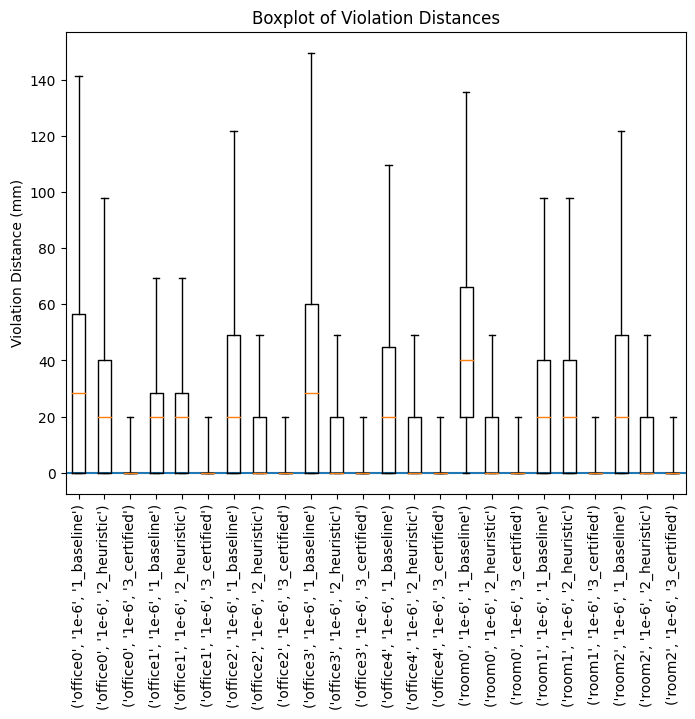

In [275]:

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(0.0)
ax.bxp(boxplot_data, showfliers=False, flierprops={"markersize": 5, "marker": '.'})
ax.set_title("Boxplot of Violation Distances")
ax.set_ylabel("Violation Distance (mm)")
plt.xticks(rotation=90)

plt.show()

In [ ]:
boxplot_data

In [ ]:

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(0.0)
ax.bxp(boxplot_data, showfliers=False, flierprops={"markersize": 5, "marker": '.'})
ax.set_title("Boxplot of Violation Distances")
ax.set_ylabel("Violation Distance (mm)")
plt.xticks(rotation=90)

plt.show()

In [201]:
distances = []
for file_name in ply_files:
    _, intensities = load_esdf_with_distance(file_name)
    distances.append(intensities)


Code block 'load_esdf/read_lines' took: 0.02255 ms


FileNotFoundError: [Errno 2] No such file or directory: 'eval_results_office0/violations_baseline.ply'

In [ ]:
distances = np.array(distances).T

(array([ 50855., 172183., 107036.,  96457.,  43901.,  23181.,   9108.,
          2766.,   1014.,    379.]),
 array([-0.1      , -0.0295682,  0.0408636,  0.1112954,  0.1817272,
         0.252159 ,  0.3225908,  0.3930226,  0.4634544,  0.5338862,
         0.604318 ]),
 <BarContainer object of 10 artists>)

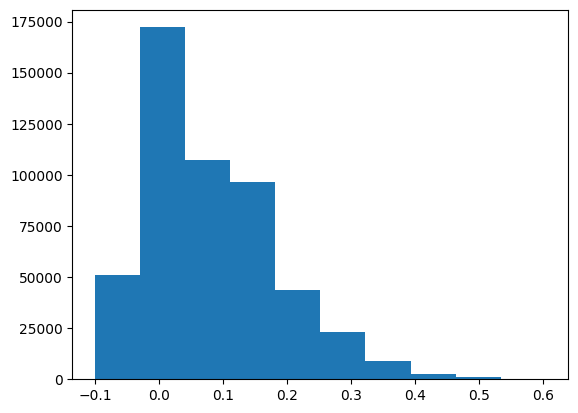

In [24]:
plt.hist(distances[:, 0])

In [21]:
np.array(distances)

(3, 589517)

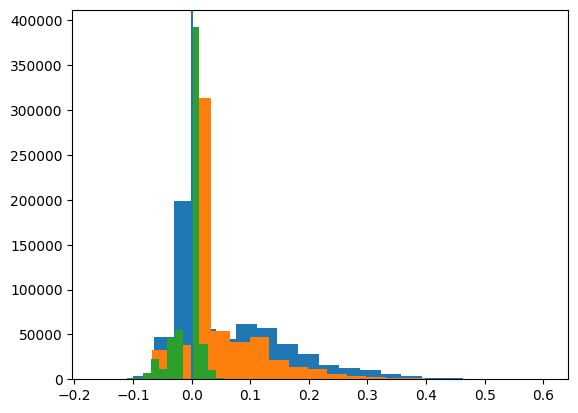

In [67]:
bins = 20
plt.hist(distances[:, 0], bins=bins)
plt.hist(distances[:, 1], bins=bins)
plt.hist(distances[:, 2], bins=bins)
plt.axvline(0.0)

In [85]:
def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

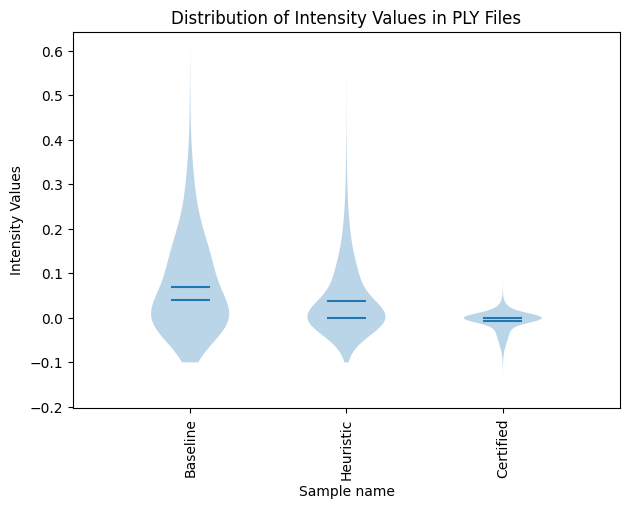

In [87]:
# Plot the box-and-whiskers plot

plt.violinplot(np.nan_to_num(distances, 0.0), showmeans=True, showextrema=False, showmedians=True,
                     bw_method=0.5, points=200)
plt.xticks(rotation=90)
plt.xlabel('PLY Files')
plt.ylabel('Intensity Values')
plt.title('Distribution of Intensity Values in PLY Files')
plt.tight_layout()

# set style for the axes
labels = ['Baseline', 'Heuristic', 'Certified']
set_axis_style(plt.gca(), labels)
    
    
plt.show()

In [56]:
labels=["baseline", "heuristic", "certified"]
boxplot_data = [boxplot_stats(distances[:, i], labels[i]) for i in range(3)]

In [57]:
boxplot_data

[{'label': 'baseline',
  'whislo': -0.1,
  'q1': 0.0,
  'med': 0.04,
  'q3': 0.128062,
  'whishi': 0.32,
  'fliers': [0.34,
   0.34,
   0.34,
   0.36,
   0.36,
   0.34,
   0.34,
   0.34,
   0.36,
   0.36,
   0.360555,
   0.360555,
   0.34,
   0.320624,
   0.34,
   0.34,
   0.36,
   0.36,
   0.380526,
   0.380526,
   0.360555,
   0.360555,
   0.340588,
   0.320624,
   0.321248,
   0.34,
   0.34,
   0.36,
   0.36,
   0.38,
   0.4005,
   0.4005,
   0.380526,
   0.360555,
   0.360555,
   0.341174,
   0.32311,
   0.32311,
   0.34,
   0.34,
   0.36,
   0.36,
   0.38,
   0.4005,
   0.4005,
   0.4005,
   0.4005,
   0.380526,
   0.360555,
   0.361109,
   0.342929,
   0.32311,
   0.324962,
   0.34,
   0.34,
   0.36,
   0.38,
   0.38,
   0.4005,
   0.4005,
   0.420476,
   0.420476,
   0.4005,
   0.4005,
   0.380526,
   0.361109,
   0.362767,
   0.342929,
   0.324962,
   0.328024,
   0.34,
   0.34,
   0.36,
   0.38,
   0.38,
   0.4,
   0.4005,
   0.420476,
   0.440454,
   0.440454,
   0.420476,
  

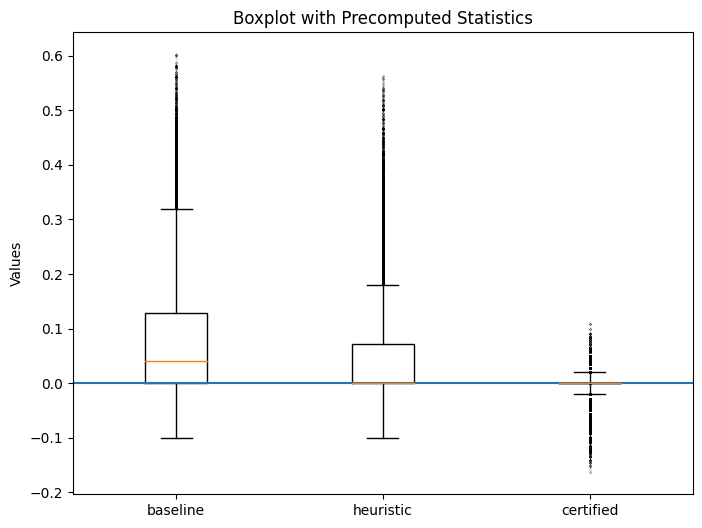

In [75]:

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bxp(boxplot_data, showfliers=True, flierprops={"markersize": 0.05})
ax.set_title("Boxplot with Precomputed Statistics")
ax.set_ylabel("Values")
plt.axhline(0.0)
plt.show()

In [4]:
import pandas as pd

In [5]:
res = {'office0': {'1e-5': {'baseline': {'max_distance': 0.604318,
                                   'total_violations': 283842,
                                   'violation_rate': 48.148229822040754,
                                   'volume': 46.14417600000001},
                      'certified': {'max_distance': 0.109545,
                                    'total_violations': 3209,
                                    'violation_rate': 0.5443439290130734,
                                    'volume': 10.739384000000001},
                      'heuristic': {'max_distance': 0.56356,
                                    'total_violations': 186017,
                                    'violation_rate': 31.554136691562757,
                                    'volume': 39.45924000000001}},
             '1e-6': {'baseline': {'max_distance': 0.384187,
                                   'total_violations': 124719,
                                   'violation_rate': 21.156132902019788,
                                   'volume': 42.33079200000001},
                      'certified': {'max_distance': 0.107703,
                                    'total_violations': 3001,
                                    'violation_rate': 0.5090608074067414,
                                    'volume': 10.938424000000001},
                      'heuristic': {'max_distance': 0.32249,
                                    'total_violations': 69517,
                                    'violation_rate': 11.792195984170093,
                                    'volume': 38.10578400000001}}}}


In [7]:
pd.DataFrame(res)

,office0
1e-5,"{'baseline': {'max_distance': 0.604318, 'total..."
1e-6,"{'baseline': {'max_distance': 0.384187, 'total..."
